In [1]:
%matplotlib inline
import pandas as pd

In [2]:
titles = pd.read_csv('data/titles.csv')
titles.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/titles.csv'

In [2]:
cast = pd.read_csv('cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [4]:
# val_counts = cast['title'].value_counts().head(10) - This too will give the ans
val_counts = cast['title'].value_counts()
repeated_values = val_counts[val_counts>1]
top_10 = repeated_values.head(10)
# top_10_df = pd.DataFrame(top_10.reset_index())
# top_10_df.columns = ['title','count']
# print(top_10_df)
top_10


title
Around the World in Eighty Days       1298
7 cajas                                689
Thelma                                 580
The Ten Commandments                   533
The Eschatrilogy: Book of the Dead     517
Catching Faith                         493
The Dark Knight Rises                  452
Welcome to Essex                       448
Cockneys vs Zombies                    437
The Buccaneer                          436
Name: count, dtype: int64

### Which three years of the 1930s saw the most films released?

In [18]:
df_1930s = cast[cast['year'].between(1930,1940)]
year_counts = df_1930s['year'].value_counts()
##counts = df_1930s['year'].count()
##year_counts


In [19]:
top_3 = year_counts.head(3)
top_3

year
1937    27437
1936    25794
1938    25205
Name: count, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
cast['decade'] = (cast['year']//10)*10
films_per_decade = cast.groupby('decade')[['title']].count()
films_per_decade

,title
decade,
1890,3
1900,70
1910,42583
1920,71309
1930,198860
1940,211371
1950,210986
1960,186455
1970,214276


<Figure size 1000x600 with 0 Axes>

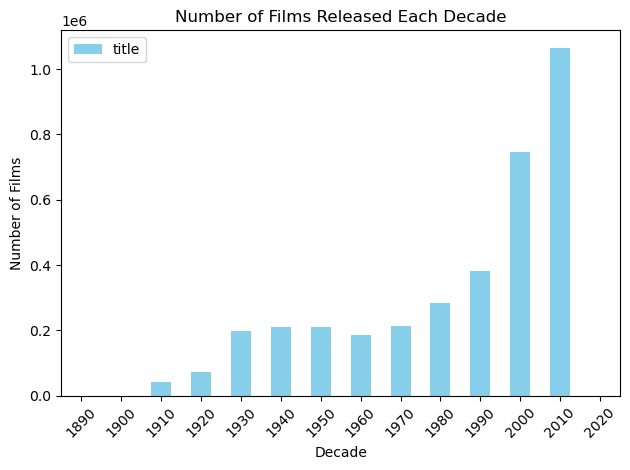

In [21]:
cast['decade'] = (cast['year']//10)*10
films_per_decade = cast.groupby('decade')[['title']].count()
plt.figure(figsize=(10, 6))
films_per_decade.plot(kind='bar', color='skyblue')
plt.title('Number of Films Released Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
# plt.ticklabel_format(style='plain')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Plot the number of "Hamlet" films made each decade.

C:\Users\DELL\AppData\Local\Temp\ipykernel_11872\2440095753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hamlet_Title['decade'] = (Hamlet_Title['year']//10)*10


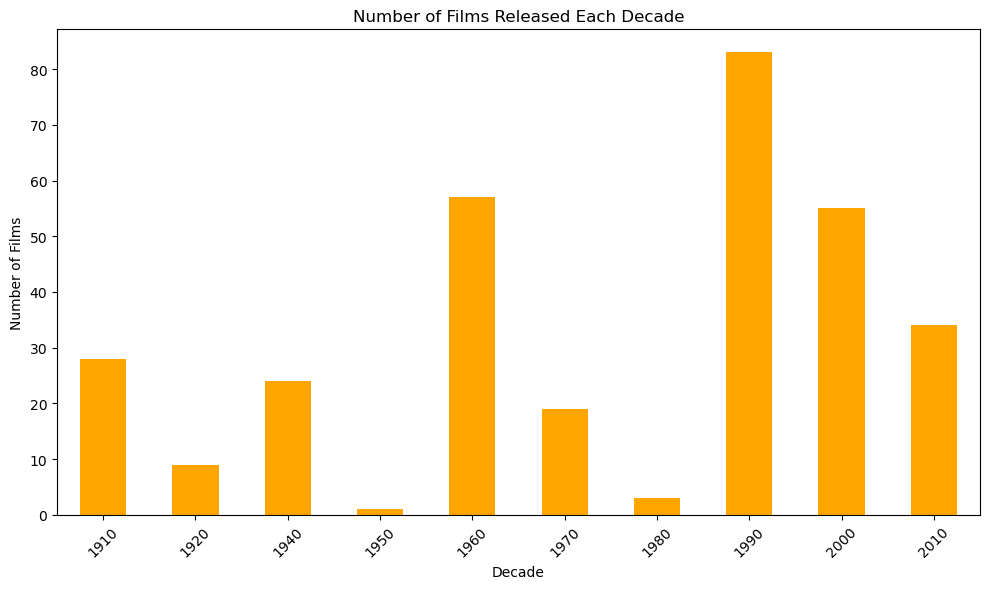

In [22]:
Hamlet_Title = cast[cast['title']=='Hamlet']
Hamlet_Title['decade'] = (Hamlet_Title['year']//10)*10
films_per_decade = Hamlet_Title.groupby('decade').size()
plt.figure(figsize=(10, 6))
films_per_decade.plot(kind='bar', color='orange')
plt.title('Number of Films Released Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Plot the number of "Rustler" characters in each decade of the history of film.

C:\Users\DELL\AppData\Local\Temp\ipykernel_11872\3991169762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rustler_char['decade'] = (Rustler_char['year']//10) * 10


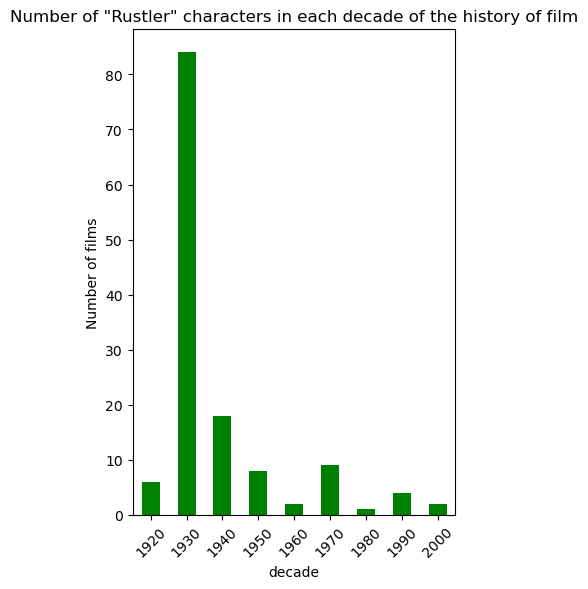

In [23]:
Rustler_char = cast[cast['character']=='Rustler']
Rustler_char['decade'] = (Rustler_char['year']//10) * 10
Rustler_film_per_decade = Rustler_char.groupby('decade').size()
plt.figure(figsize=(4,6))
Rustler_film_per_decade.plot(kind='bar',color='green')
plt.title('''Number of "Rustler" characters in each decade of the history of film''')
plt.xlabel("decade")
plt.ylabel("Number of films")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Plot the number of "Hamlet" characters each decade.

C:\Users\DELL\AppData\Local\Temp\ipykernel_11872\3450697353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hamlet_char['decade'] = (Hamlet_char['year']//10) * 10


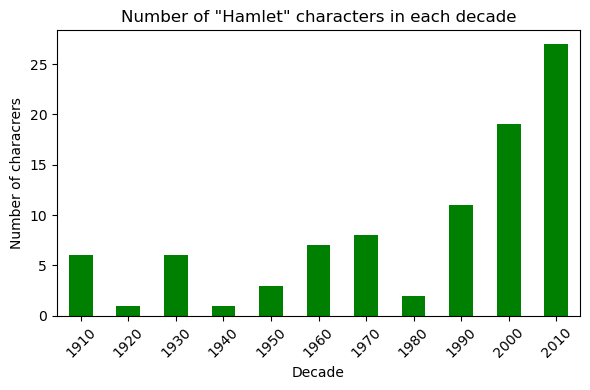

In [88]:
Hamlet_char = cast[cast['character']=='Hamlet']
Hamlet_char['decade'] = (Hamlet_char['year']//10) * 10
Hamlet_film_per_decade = Hamlet_char.groupby('decade').size()
plt.figure(figsize=(6,4))
Hamlet_film_per_decade.plot(kind='bar',color='green')
plt.title('''Number of "Hamlet" characters in each decade''')
plt.xlabel("Decade")
plt.ylabel("Number of characrers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### What are the 11 most common character names in movie history?

In [4]:
val_count = cast['character'].value_counts().head(11)
# val = cast['character'].count()
val_count

character
Himself        19486
Dancer         11995
Extra          10887
Reporter        8127
Doctor          7402
Student         7146
Policeman       6855
Party Guest     6718
Nurse           6637
Bartender       6583
Minor Role      6219
Name: count, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [25]:
herself_data = cast[cast['character']=='Herself']
Top_10_herself = herself_data['name'].value_counts().head(10)
Top_10_herself

name
Queen Elizabeth II    11
Joyce Brothers         9
Margaret Thatcher      7
Mary Jo Pehl           7
Hillary Clinton        6
Joan Rivers            6
Rekha                  5
Marilyn Monroe         5
Bunny Yeager           5
Caroline Rhea          5
Name: count, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [29]:
himself_data = cast[cast['character']=='Himself']
Top_10_himself = himself_data['name'].value_counts().head(10)
Top_10_himself

name
Adolf Hitler             99
Richard Nixon            45
Ronald Reagan            39
John F. Kennedy          33
Winston Churchill        23
Ron Jeremy               23
George W. Bush           23
Benito Mussolini         22
Franklin D. Roosevelt    20
Bill Clinton             20
Name: count, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [57]:
# names = year.groupby('name')
# highest_movies = names['title'].value_counts().max()
# highest_movies

In [58]:
year = cast[cast['year']==1945]
name = year['name'].value_counts().head(1)
name

name
Emmett Vogan    39
Name: count, dtype: int64

In [41]:
# artist = cast[(cast['name']=='Emmett Vogan') & (cast['year']==1945)]
# artist
# name = year['name'].value_counts().max()
# name

### Which actors or actresses appeared in the most movies in the year 1985?

In [59]:
year = cast[cast['year']==1985]
name = year['name'].value_counts().head(1)
name

name
Shakti Kapoor    21
Name: count, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

In [5]:
mammooo_data = cast[cast['name']=='Mammootty']
mammooo_data
mammoo_year = mammooo_data.groupby('year')
mammoo_year['character'].count().max()

21

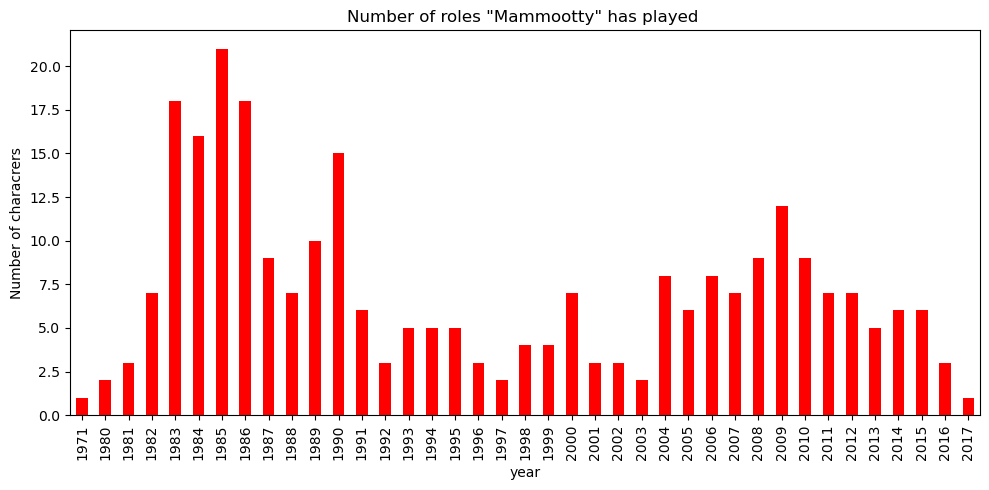

In [89]:
mammooo_data = cast[cast['name']=='Mammootty']
mammooo_data
mammoo_year = mammooo_data.groupby('year').size()
plt.figure(figsize=(10,5))
mammoo_year.plot(kind = 'bar',color='red')
plt.title('''Number of roles "Mammootty" has played ''')
plt.xlabel("year")
plt.ylabel("Number of characrers")
# plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7952\2492700725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mammooo_data['decade'] = (mammooo_data['year']//10) * 10


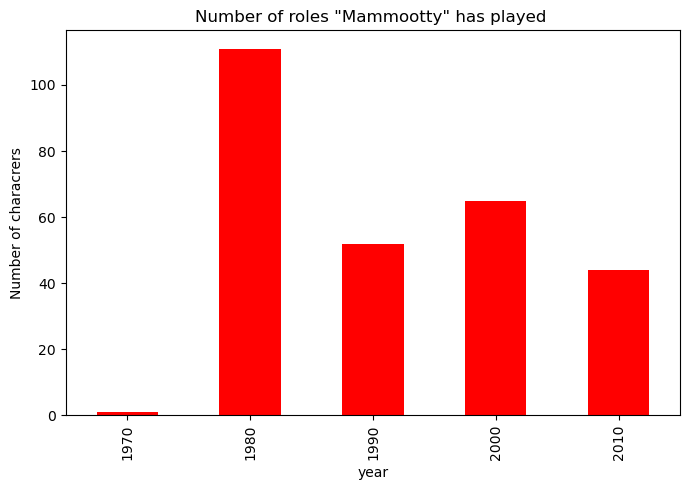

In [48]:
mammooo_data = cast[cast['name']=='Mammootty']
mammooo_data['decade'] = (mammooo_data['year']//10) * 10
mammooo_data
mammoo_year = mammooo_data.groupby('decade').size()
plt.figure(figsize=(7,5))
mammoo_year.plot(kind = 'bar',color='red')
plt.title('''Number of roles "Mammootty" has played ''')
plt.xlabel("year")
plt.ylabel("Number of characrers")
# plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [28]:
cast['character'].isnull().sum()

14

In [29]:
cast.dtypes

title         object
year           int64
name          object
type          object
character     object
n            float64
dtype: object

In [32]:
cast['character'].mode()

0    Himself
Name: character, dtype: object

In [30]:
cast['character'] = cast['character'].fillna(str(cast['character'].mode()))

In [31]:
cast['character'].isnull().sum()

0

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [46]:
patron_roles = cast[cast['character'].str.startswith('Patron in')]['character'].value_counts().head(10)
patron_roles

character
Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in restaurant             4
Patron in cabaret                3
Patron in Restaurant             3
Patron in Club                   3
Patron in Quiet Bar              2
Name: count, dtype: int64

In [47]:
result_df = pd.DataFrame({'Character': patron_roles.index, 'Count': patron_roles.values})
result_df

,Character,Count
0,Patron in Frisky Rabbit,16
1,Patron in Chinese Restaurant,9
2,Patron in the Coffee House,9
3,Patron in Billiard Parlor,5
4,Patron in Bar,4
5,Patron in restaurant,4
6,Patron in cabaret,3
7,Patron in Restaurant,3
8,Patron in Club,3
9,Patron in Quiet Bar,2


### What are the 10 most frequent roles that start with the word "Science"?

In [48]:
Science_role = cast[cast['character'].str.startswith('Science')]['character'].value_counts().head(10)
Science_role

character
Science Teacher         60
Science Student          9
Science Fair Student     9
Science Fair Judge       6
Science Kid              6
Science Club Member      5
Science Promo Cadet      5
Science Reporter         5
Science                  4
Science Officer          3
Name: count, dtype: int64

In [39]:
# plt.figure(figsize = (13, 8))
Judi_data = cast[cast['name']=='Judi Dench']
# ax = sns.countplot(x = 'character', data = Judi_data, palette = 'dark')
# ax.set_title(label = 'Count of roles on Basis of Height', fontsize = 20)
# ax.set_xlabel(xlabel = 'Height in Foot per inch', fontsize = 16)
# ax.set_ylabel(ylabel = 'Count', fontsize = 16)
# plt.show()
Judi_data.shape

(55, 6)

### Plot the n-values of the roles that Judi Dench has played over her career.

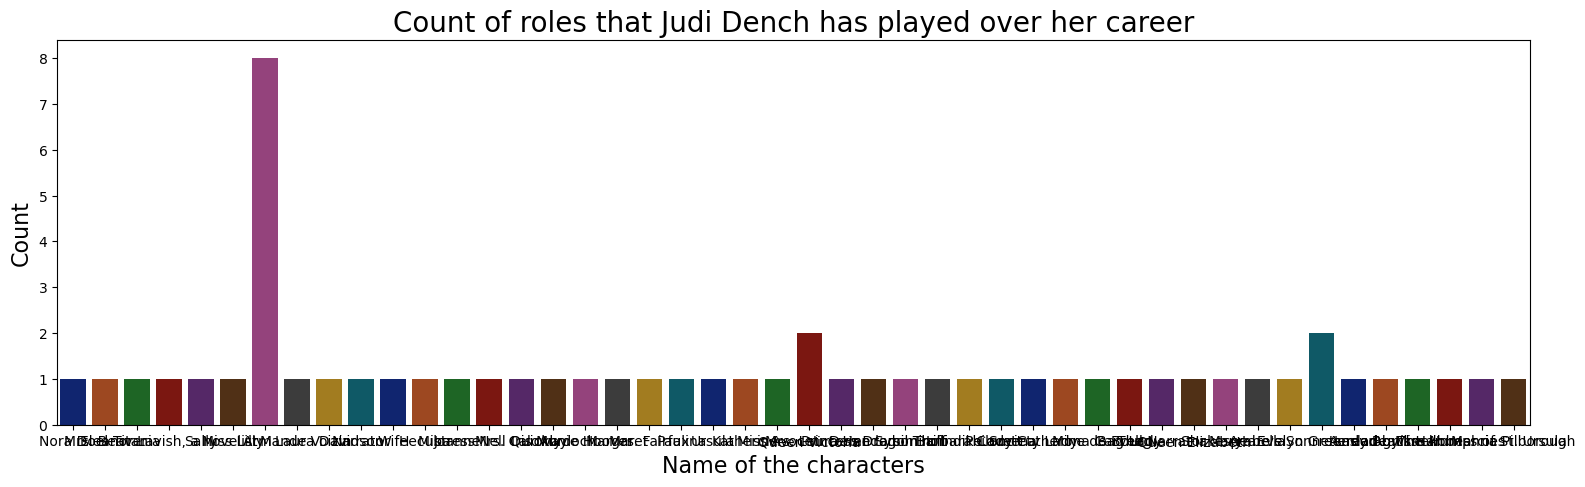

'Wife'

In [45]:
plt.figure(figsize = (19,5))
Judi_data = cast[cast['name']=='Judi Dench']
ax = sns.countplot(x = 'character', data = Judi_data, palette = 'dark')
ax.set_title(label = 'Count of roles that Judi Dench has played over her career', fontsize = 20)
ax.set_xlabel(xlabel = 'Name of the characters', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()
Judi_data['character'].max()

In [46]:
#### not sure how to plot this whith right visuals, Please help

### Plot the n-values of Cary Grant's roles through his career.

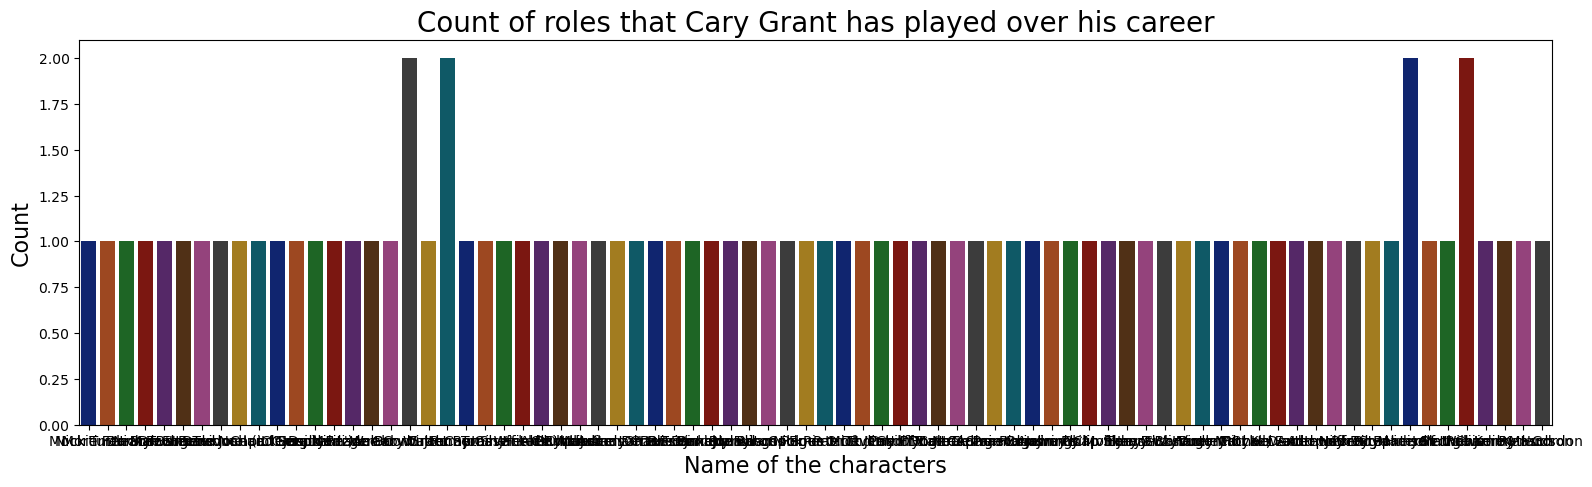

'Walter Burns'

In [50]:
plt.figure(figsize = (19,5))
cary_data = cast[cast['name']=='Cary Grant']
ax = sns.countplot(x = 'character', data = cary_data, palette = 'dark')
ax.set_title(label = 'Count of roles that Cary Grant has played over his career', fontsize = 20)
ax.set_xlabel(xlabel = 'Name of the characters', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()
cary_data['character'].max()

In [ ]:
#### not sure how to plot this whith right visuals, Please help

In [69]:
v = cast[cast['name']=='Sidney Poitier']
# v.count()
v

,title,year,name,type,character,n
1751059,A Patch of Blue,1965,Sidney Poitier,actor,Gordon Ralfe,1.0
1751060,A Piece of the Action,1977,Sidney Poitier,actor,Manny Durrell,1.0
1751061,A Raisin in the Sun,1961,Sidney Poitier,actor,Walter Lee Younger,1.0
1751062,A Warm December,1973,Sidney Poitier,actor,Dr. Matt Younger,1.0
1751063,All the Young Men,1960,Sidney Poitier,actor,Sgt. Eddie Towler,2.0
1751064,Band of Angels,1957,Sidney Poitier,actor,Rau-Ru,3.0
1751065,Blackboard Jungle,1955,Sidney Poitier,actor,Gregory W. Miller,10.0
1751066,Brother John,1971,Sidney Poitier,actor,John Kane,1.0
1751067,Buck and the Preacher,1972,Sidney Poitier,actor,Buck,1.0
1751068,"Cry, the Beloved Country",1951,Sidney Poitier,actor,Reverend Msimangu,3.0


### Plot the n-value of the roles that Sidney Poitier has acted over the years.

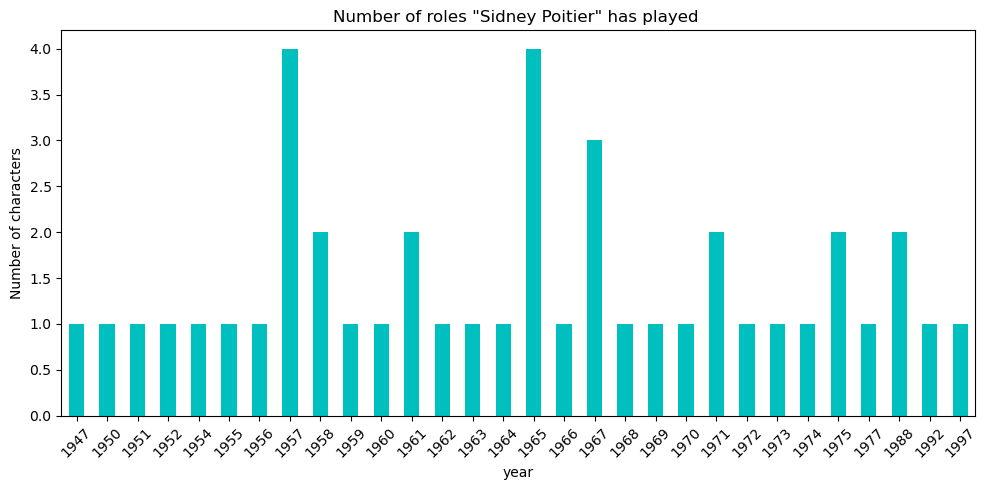

In [54]:
sidney_data = cast[cast['name']=='Sidney Poitier']
sidney_data
sidney_year = sidney_data.groupby('year').size()
plt.figure(figsize=(10,5))
sidney_year.plot(kind = 'bar',color='c')
plt.title('''Number of roles "Sidney Poitier" has played ''')
plt.xlabel("year")
plt.ylabel("Number of characters")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [83]:
# cast[(cast['type']=='actor') & (cast['n']==1) & (cast['year'].between(1950,1959))].sort_values(ascending=True, by = 'year').count()


title        6599
year         6599
name         6599
type         6599
character    6599
n            6599
dtype: int64

In [87]:
lead_role_actor = cast[(cast['type']=='actor') & (cast['n']==1) & (cast['year'].between(1950,1959))]['type'].value_counts().values
print(f"leading roles were available to actors in the 1950s is : {lead_role_actor}")

leading roles were available to actors in the 1950s is : [6599]


In [89]:
lead_role_actress = cast[(cast['type']=='actress') & (cast['n']==1) & (cast['year'].between(1950,1959))]['type'].value_counts().values
print(f"leading roles were available to actress in the 1950s is : {lead_role_actress}")

leading roles were available to actress in the 1950s is : [2953]


In [86]:
cast['type'].value_counts()

type
actor      2440028
actress    1171184
Name: count, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [91]:
support_role_actor = cast[(cast['type']=='actor') & (cast['n']==2) & (cast['year'].between(1950,1959))]['type'].value_counts().values
print(f"supporting roles were available to actors in the 1950s is : {support_role_actor}")

supporting roles were available to actors in the 1950s is : [4550]


In [92]:
support_role_actress = cast[(cast['type']=='actress') & (cast['n']==2) & (cast['year'].between(1950,1959))]['type'].value_counts().values
print(f"supporting roles were available to actress in the 1950s is : {support_role_actress}")

supporting roles were available to actress in the 1950s is : [4544]
